In [3]:
import random as rdm
import matplotlib.pyplot as plt
import math 

## Algoritmo basado en el método de aceptación y rechazo.

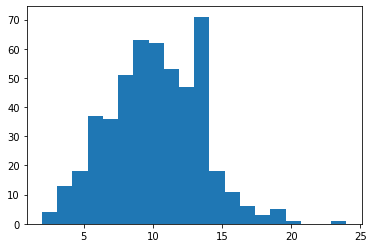

In [4]:
#Primero el código para generar una variable aleatoria de Poisson
def poisson(lamda):
    p = math.exp(-lamda);
    F = p
    for j in range(1, int(lamda) + 1):
        p *= lamda / j
        F += p
    U = rdm.random()
    if U >= F:
        j = int(lamda) + 1
        while U >= F:
            p *= lamda / j; F += p
            j += 1
        return j - 1
    else:
        j = int(lamda)
        while U < F:
            F -= p;
            p *= j/lamda
            j -= 1
        return j+1

l = [poisson(10) for i in range(0,500)]
plt.hist(l, bins=20)
plt.show() 

In [5]:
def truncated_poisson(lamda, k):
    y = poisson(lamda)
    while(y>k):
        y = poisson(lamda)
    return y

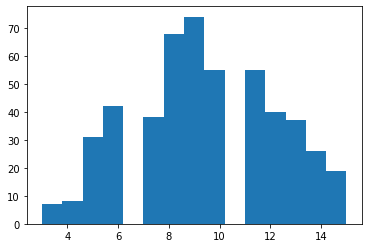

In [6]:
l = [truncated_poisson(10, 15) for i in range(0,500)]
plt.hist(l, bins=15)
plt.show()


## Algoritmo basado en el método de la transformada inversa.

In [7]:
def truncated_poisson_ti(λ, k):
    pᵢ = math.exp(-λ)
    p = pᵢ
    Fₖ = p
    for i in range(1,k+1):
        p *= λ / i
        Fₖ+=p
    p = pᵢ / Fₖ
    F = p
    u = rdm.random()
    i = 1
    while F <= u:
        p *= λ / i
        F+=p
        i+=1
    return i
     

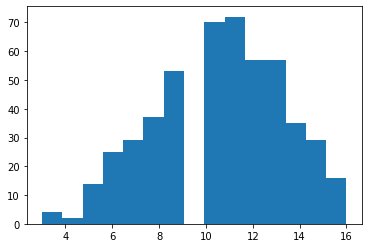

In [8]:
l = [truncated_poisson_ti(10, 15) for i in range(0,500)]
plt.hist(l, bins=15)
plt.show()


## Estimación del valor de P(X>2)

In [46]:
# P(X>2) = 1 - P(X<= 2)
poisson_pmf = lambda i: 0.7**i * math.exp(-0.7) / math.factorial(i)
F = sum(poisson_pmf(i) for i in range(11)) 
real = 1 - sum(poisson_pmf(i) / F for i in range(3))

N = 10000
estimation = sum(1 if x > 2 else 0 for x in (truncated_poisson(0.7,10) for _ in range(N))) / N

print("Actual value: %f, estimate: %f, relative error: %f" % (real,estimation, abs(real-estimation)/real))

Actual value: 0.034142, estimate: 0.035000, relative error: 0.025143
